[View in Colaboratory](https://colab.research.google.com/github/igrosny/deep_learning_book/blob/master/Capitulo_4_Numerical_Computation.ipynb)

Apuntes del capitulo 4 del libro  [Deep Learning](http://www.deeplearningbook.org)

# 4. Computacion Numerica

Aprendizaje automatico requiere una gran cantidad de computacion numerica ya que intenta resolver los problemas a traves de la actualizacion de estimar una solucion con un proceso iterativo. Esto puede ser con optimizacion o tras resolver sistemas lineales.



## 4.1 Overflow y Underflow

El problema de aproximar por redondeo es que despues de muchas operaciones podes llegar a acumular demasiado error

**underflow** ocurre cuando un numero cerca de cero se redondea a cero.

**overflow** ocurre cuando numeros de gran magnitud se redondean como $\infty$ o $-\infty$ 

In [39]:
logits = [-2.0, 221.0, -999990.1]
sum(logits)
import numpy as np
np.exp(0) == 1

exps = [np.exp(i) for i in logits]
exps
sum_of_exps = sum(exps)
softmax = [j/sum_of_exps for j in exps]
softmax

[1.4201379580102718e-97, 1.0, 0.0]

## 4.2 Condicionamiento pobre
Conditioning se refiere a que tan rapido una funcion cambia con respecto a pequeños cambios en la entrada

## 4.3 Optimizacion gradient based

La optimizacion es la tarea de minimizar o maximizar alguna funcion $f(x)$ alterando $x$. La funcion que queremos minimizar o maximizar se llama *funcion objetivo* o **criterio**. Cuando estamos minimizando tambien la podemos llamar **funcion de costo, funcion de perdida y funcion de error**

La derivada de la funcion $f'(x)$ nos da la pendiente de $f(x)$ en el punto $x$

Por eso usamos la derivada para minimizar una funcion, porque nos dice cuando cambiar x para que haya una pequeña mejor en y

Esta tecnica se llama **gradiente descendiente**

Cuando la $f'(x) = 0$ se llama punto critico o punto estacionario

Minimo local es cuando el punto f(x) es el mas bajo de todos sus vecinos.

Maximo local es cuando el punto f(x) es el mas alto de todos sus vecinos.

Saddle points, no son ni maximos ni minimos.

**Minimo global** se llama al punto donde se obtiene el valor mas bajo de f(x)

Cuando la funcion tiene multiples entradas tenemos que usar derivadas parciales. La derivada parcial $\frac{\partial}{\partial{x_i}}f(x)$ mide como f cambia solo cuando la variabl $x_i$ incrementa en el punto **x**. El **gradiente** de f es el vector el vector que contiene todas las derivadas parciales $\nabla_x f(x)$. El elemento i del gradiente es la derivada parcial de f con respecto a $x_i$

La **derivada direccional** en la direccion **u** (vector unitario) es la pendiente de funcion f en la direccion u

**gradient descent** es reducir f moviendo en direccion del gradiente negativo

Velocidad de aprendizaje (**learning rate**) es un escalar positivo que determina el tamaño del siguiente paso

$x' = x - \epsilon\nabla_xf(x)$

Lo mas comun es $\epsilon$ sea una constante pequeña. Gradient descent termina cuando todos los elementos del gradiente son cero (o muy cerca de)


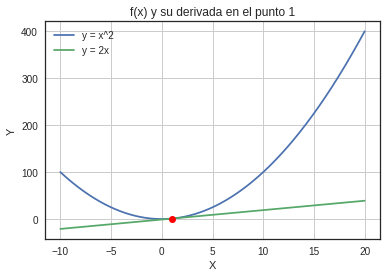

In [40]:
import matplotlib.pyplot as plt                                                 
import numpy as np

## Create functions and set domain length
x = np.arange(-10.0, 20.0, 0.01)
y = x**2
dy = 2*x - 1

## Plot functions and a point where they intersect
plt.plot(x, y)
plt.plot(x, dy)
plt.plot(1, 1, 'or')

## Config the graph
plt.title('f(x) y su derivada en el punto 1')
plt.xlabel('X')
plt.ylabel('Y')
#plt.ylim([0, 4])
plt.grid(True)
plt.legend(['y = x^2', 'y = 2x'], loc='upper left')

## Show the graph
plt.show()

### Ejemplo de vector gradiente y derivada parciales

Se $f(x,y)=\sqrt{x^2+y^2}$

a) Encontrar el **vector gradiente** de f en el punto $P(4,3)$

b) Calcular la **derivada direccional** de f en la direccion del vector del punto $P(4,3)$ al punto
$Q(1,0)$

$f(x,y)=\sqrt{x^2+y^2}=(x^2+y^2)^\frac{1}{2}$

Calculo la derivada parcial con respecto a x

$f'_x = \frac{\partial f}{\partial x}\frac{1}{2}(x^2+y^2)^\frac{-1}{2}.(2x) = \frac{x}
{\sqrt{x^2+y^2}}$

Evaluo la derivada parcial en el punto P

$f'_x(P)= \frac{4}{\sqrt{4^2+(-3)^2}}=\frac{4}{\sqrt{25}}=\frac{4}{5}$

Calculo la derivada parcial con respecto a y

$f'_y = \frac{\partial f}{\partial y}\frac{1}{2}(x^2+y^2)^\frac{-1}{2}.(2y) = \frac{y}
{\sqrt{x^2+y^2}}$

Evaluo la derivada parcial en el punto P

$f'_y(P)= \frac{-3}{\sqrt{4^2+(-3)^2}}=\frac{-3}{\sqrt{25}}=\frac{-3}{5}$

Con esto se contruye el vector gradiente de la funcion f en el punto p

$\nabla\vec f(p)=[f'_x(p),f'_y(p)]=[\frac{4}{5},\frac{-3}{5}]$

Se puede escribir en puncion de los vectores unitarios

$\nabla\vec f(p)=[\frac{4}{5}\hat i,\frac{-3}{5}\hat j]$

b) Determinamos el vector PQ, porque nos piden la derivada direccional que va desde el punto P al punto Q

Determinamos el vector con la resta de la coordenadas

$\vec {PQ} = Q(1,0) - P(4,-3)$

$\vec{PQ} = [-3, 3]$

Calculamos la norma de ese vector (magnitud, modulo o norma)

$||\vec{PQ}|| = \sqrt{(-3)^2 + 3^2} = \sqrt{18} = 3\sqrt{2}$

Determinamos el vector u en la direccion PQ

$\vec U = \frac{\vec{PQ}}{||\vec{PQ}||}=\frac{[-3,3]}{3\sqrt{2}}$

$\vec U = [\frac{-1}{\sqrt{2}},\frac{1}{\sqrt{2}}]$

Con el vector unitario podemos calcular la derivada direccional de la funcion f en la direccion U

$D_uf= \nabla\vec f(p) \cdot \vec U$

$D_uf = [\frac{4}{5}, \frac{-3}{5}] \cdot  [\frac{-1}{\sqrt{2}},\frac{1}{\sqrt{2}}]$

$D_uf = \frac{-7}{5\sqrt{2}}$

Racionalizamos?

$D_uf = \frac{-7}{5\sqrt{2}}.\frac{\sqrt{2}}{\sqrt{2}}= \frac{-7\sqrt{2}}{10}$

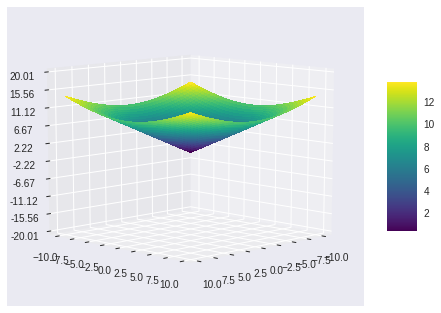

In [21]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')
ax.view_init(10, 45)
# Generando la data
X = np.arange(-10, 10, 0.25)
Y = np.arange(-10, 10, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sqrt(X**2 + Y**2)

# Dibujando la superficie
surf = ax.plot_surface(X, Y, Z, cmap='viridis',
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-20.01, 20.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

### 4.3.1 Mas allá del gradiente matrices Jacobianas y Hessianas

a veces necesitamos encontrar todas la derivadas parciales de una funcion que su entrada y salida son vectores. Una matriz que contiene todas las derivadas parciales se llama **Matriz Jacobiana**


### Propiedades de linearidad

[Jacobian prerequisite knowledge](https://www.youtube.com/watch?v=VmfTXVG9S0U&list=PLSQl0a2vh4HC5feHa6Rc5c0wbRTx56nF7&index=69)

$L(a\vec v) = aL(\vec v)$

$L(\vec v + \vec w) = L(\vec v) + L(\vec w)$

Ejemplo

$\begin{bmatrix}
    2 & -3  \\
    1 & 1 
  \end{bmatrix}
 \begin{bmatrix}
    x \\
    y
  \end{bmatrix}
  \Rightarrow
  \begin{bmatrix}
    2x + (-3)y  \\
    1x + 1y
  \end{bmatrix}
  $
  
  La base de R2
  
  $\begin{bmatrix}
    1  \\
    0
  \end{bmatrix}
  ,
    \begin{bmatrix}
    0  \\
    1
  \end{bmatrix}
  $
  
  Si multiplico la matriz por la primer base
  
  $\begin{bmatrix}
    2 & -3  \\
    1 & 1 
  \end{bmatrix}
  \begin{bmatrix}
    1  \\
    0
  \end{bmatrix}
  \begin{bmatrix}
    2+0  \\
    1+0
  \end{bmatrix}
  $
  
  $ L \Bigg(\begin{bmatrix}
    x  \\
    y
  \end{bmatrix}\Bigg) =
  L \Bigg(x\begin{bmatrix}
    1  \\
    0
  \end{bmatrix} +
  y\begin{bmatrix}
    0  \\
    1
  \end{bmatrix}\Bigg)$
  
  
  $ 
 x L \Bigg(\begin{bmatrix}
    1  \\
    0
  \end{bmatrix}\Bigg) +
  yL\Bigg(\begin{bmatrix}
    0  \\
    1
  \end{bmatrix}\Bigg)$


Ejemplo



$f \Bigg( 
\begin{bmatrix}
    f_1(x,y) \\
    f_2(x,y)
  \end{bmatrix}
\Bigg)=
\begin{bmatrix}
    x+sin(y) \\
    y+sin(x)
  \end{bmatrix}$
  
  Matriz de las derivadas parciales, que transdformacion sufre en un espacio muy pequeño
  
 $\begin{bmatrix}
   \frac{\partial f_1}{\partial x} & \frac{\partial f_1}{\partial y} \\
    \frac{\partial f_2}{\partial x} & \frac{\partial f_2}{\partial y}
  \end{bmatrix}$
  
  
   $\begin{bmatrix}
   1 & cos(y) \\
    cos( x) & 1
  \end{bmatrix}$
  
  
  Que pasa en el punto (-2, 1)
  
 $\begin{bmatrix}
   1 & cos(1) \\
    cos( -2) & 1
  \end{bmatrix}$
  
$\begin{bmatrix}
   1 & 0.54 \\
    -0.42 & 1
  \end{bmatrix}$

## Hessian Matrix

Es la matriz de la segunda derivada

$f(x, y) = e^{\frac{x}{2}}sin(y)$

$H_f = \begin{bmatrix}
\frac{\partial^2f}{\partial x^2} & \frac{\partial^2f}{\partial x\partial y} \\
\frac{\partial^2f}{\partial x\partial y} & \frac{\partial^2f}{\partial y^2} 
\end{bmatrix}$

Calculamos las primeras derivadas

$\frac{\partial^2f}{\partial x} = \frac{1}{2}e^{\frac{x}{2}}sin(y)$

$\frac{\partial^2f}{\partial y} = e^{\frac{x}{2}}cos(y)$

Calculamos las segunda derivadas

$H_f = \begin{bmatrix}
\frac{1}{4}e^{\frac{x}{2}}sin(y) & \frac{1}{2}e^{\frac{x}{2}}cos(y) \\
\frac{1}{2}e^{\frac{x}{2}}cos(y) & e^{\frac{x}{2}}(-sin(y))
\end{bmatrix}$

https://www.youtube.com/watch?v=YHB2reIlNsI

### Ejemplo de optimizacion por gradient descent

$f(x) = (x-2)^2$

TOmamos la derivada
$f'(x) = 2(x-2)$

para hacer gradient descent, tomar una valor inicial (que es bastante importante para el resultado

$x^0 = 4$

Se hacen varias iteraciones

$x^{i+1} = x^i- lf'(x^i)$

$f'(x^0) = 2(x^0 -2) = 2(-2) = 4$

$x^1 = x^0 -0,9 . 4 = 4-0,9.4 0.4$


Si elegimos el learning rate incorrecto, probrar 1,1 a 0.1

lo mas grande que converga



4 4
0.3999999999999999 2.5600000000000005
3.2800000000000002 1.6384000000000007
0.9759999999999995 1.048576000000001
2.8192000000000004 0.6710886400000006
1.3446399999999996 0.4294967296000005
2.5242880000000003 0.2748779069440003
1.5805695999999996 0.17592186044416036
2.3355443200000003 0.11258999068426263
1.7315645439999998 0.07205759403792804
2.2147483648 0.04611686018427394
1.82820130816 0.02951479051793531
2.137438953472 0.018889465931478572
1.8900488372224 0.012089258196146287


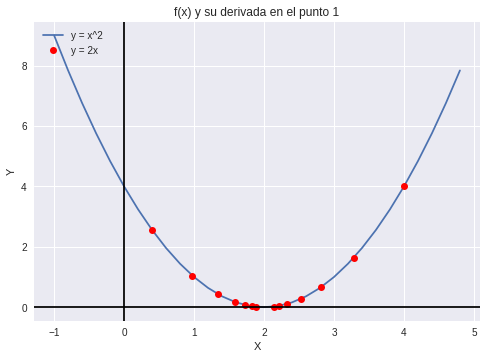

In [8]:
import matplotlib.pyplot as plt                                                 
import numpy as np


x = np.arange(-1.0, 5.0, 0.2)
y = (x-2)**2
dy = 2*(x - 2)

x0 = 4
lr = .9

plt.plot(x, y)

x = x0 
for i in range(1, 15):
  y = (x-2)**2
  print(x,y)
  plt.plot(x, y, 'or')
  x = x-lr*(2*(x-2))
  

## Config the graph

plt.xlabel('X')
plt.ylabel('Y')
#plt.ylim([0, 4])
plt.grid(True)
plt.axhline(0, color='black')
plt.axvline(0, color='black')

plt.show()

Se puede minimizar igualando la derivada a 0

resolviendo
$f'(x) = 0$

donde $f'(x) = 2(x-2)$ y las $f''(x) =2 =h(x)$ <--- (En multidimiensional)

la primer derivada es la pendiente, la segunda derivada es la pendiente de la primer dervidad midiendo que tan rapido cambia la pendiente. mide la curvatura?

$x^{i+1} =  2$

$x^{i+1} =  x^i + (x_i - 2)$

$x^{i+1} =  x^i + \frac{2 (x_i - 2)}{2}$

$x^{i+1} =  x^i + f'(x).h^{-1}(x)$



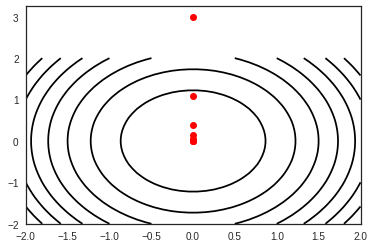

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

def f(x, y):
    return 2*x**2 + y**2
  
x = np.linspace(-2, 2, 40)
y = np.linspace(-2, 2, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.contour(X, Y, Z, colors='black');
#plt.contour(X, Y, Z, 20, cmap='RdGy');


x0 = 1
x1 = 1
lr = .4

x = x0 
for i in range(1, 10):
  z = f(x0,x1)
  plt.plot(x0, x1, z, 'or')
  x0 = x0-lr*(4*(x0))
  x1 = x1-lr*(4*(x1))

plt.show()

Conditon Number

In machine learning siempre tenemos una loss function, es una hinge loss in an SVM Model or softmax loss in multionomial 

ayuda a ver si los features son independientes

Ratio entre autovelores max y min


## Ejemplo

https://github.com/Shreyas3108/house-price-prediction/blob/master/housesales.ipynb

In [0]:
#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [0]:
data = pd.read_csv("https://github.com/Shreyas3108/house-price-prediction/raw/master/kc_house_data.csv")

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<function seaborn.utils.despine>

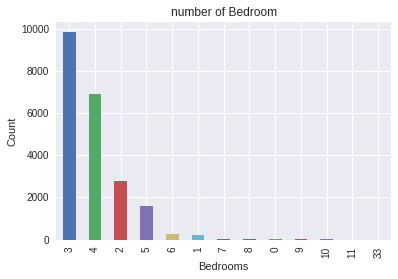

In [6]:
data['bedrooms'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

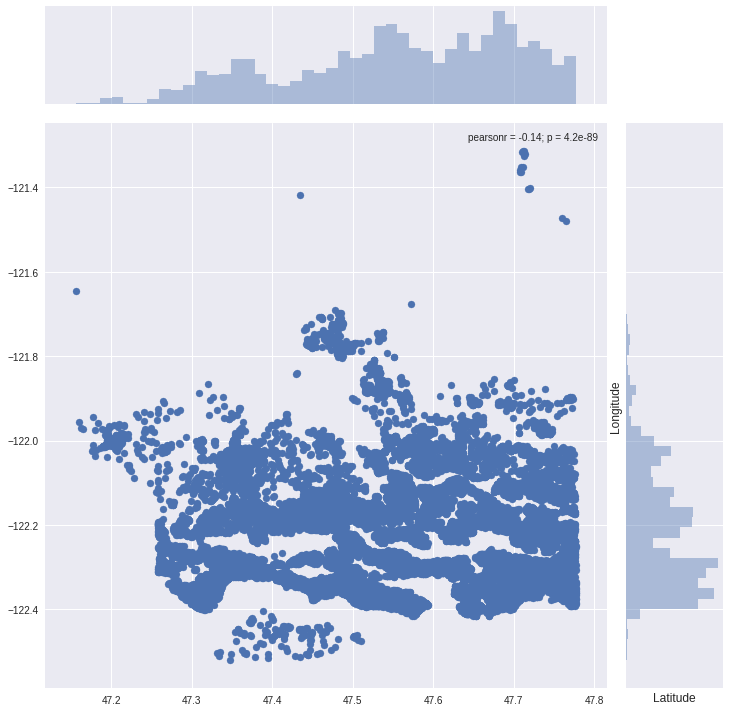

<function seaborn.utils.despine>

In [8]:
plt.figure(figsize=(10,10))
sns.jointplot(x=data.lat.values, y=data.long.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
sns.despine

Text(0.5,1,'Price vs Square Feet')

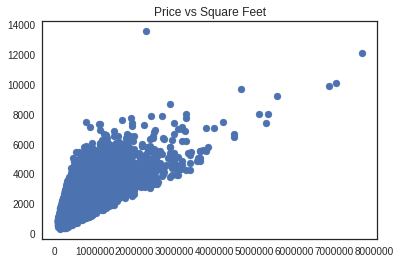

In [23]:


plt.scatter(data.price,data.sqft_living)
plt.title("Price vs Square Feet")



Text(0.5,1,'Price vs Location of the area')

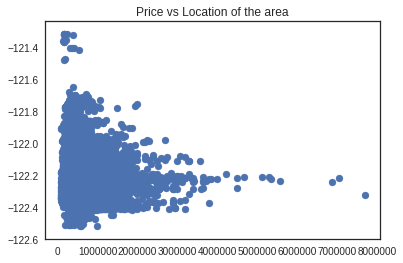

In [24]:
plt.scatter(data.price,data.long)
plt.title("Price vs Location of the area")

Text(0.5,1,'Latitude vs Price')

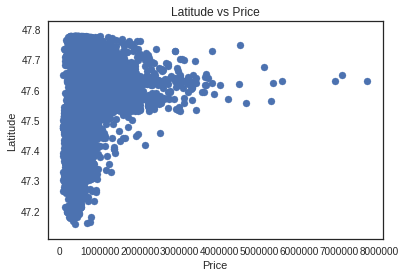

In [25]:


plt.scatter(data.price,data.lat)
plt.xlabel("Price")
plt.ylabel('Latitude')
plt.title("Latitude vs Price")



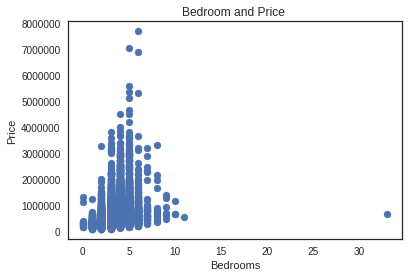

<function seaborn.utils.despine>

In [26]:
plt.scatter(data.bedrooms,data.price)
plt.title("Bedroom and Price ")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()
sns.despine

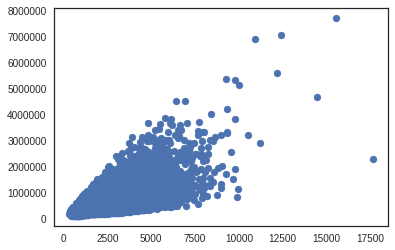

In [27]:
plt.scatter((data['sqft_living']+data['sqft_basement']),data['price'])

Text(0.5,1,'Waterfront vs Price ( 0= no waterfront)')

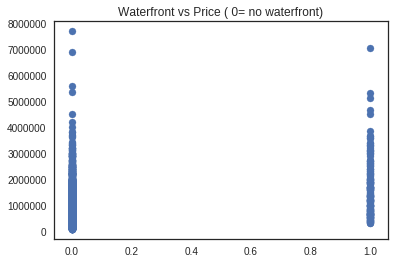

In [28]:
plt.scatter(data.waterfront,data.price)
plt.title("Waterfront vs Price ( 0= no waterfront)")

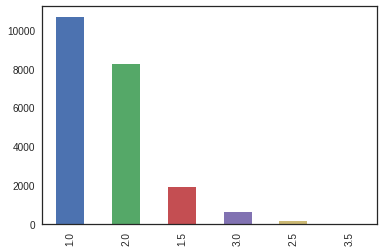

In [31]:
train1 = data.drop(['id', 'price'],axis=1)


train1.head()


data.floors.value_counts().plot(kind='bar')

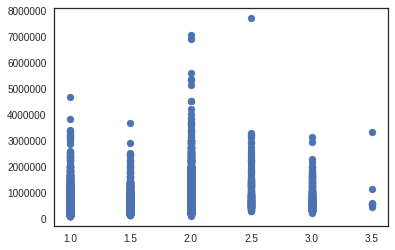

In [32]:


plt.scatter(data.floors,data.price)



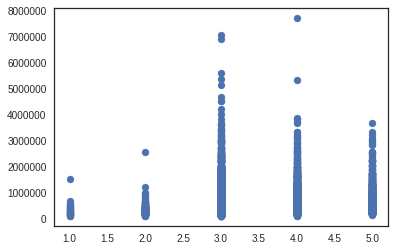

In [33]:


plt.scatter(data.condition,data.price)



Text(0.5,1,'Which is the pricey location by zipcode?')

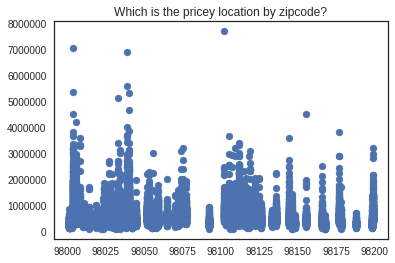

In [34]:


plt.scatter(data.zipcode,data.price)
plt.title("Which is the pricey location by zipcode?")



In [0]:


from sklearn.linear_model import LinearRegression



In [0]:


reg = LinearRegression()



In [0]:


labels = data['price']
conv_dates = [1 if values == 2014 else 0 for values in data.date ]
data['date'] = conv_dates
train1 = data.drop(['id', 'price'],axis=1)

